# Цель проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска

Импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.xls')

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [2]:
display(stud.head())
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

## Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

### Рассмотрим признаки по отдельности

# 1. school - аббревиатура школы, в которой учится ученик

Посмотрим сколько разных школ содержит наш датасет

In [3]:
pd.DataFrame(stud.school.value_counts())

,school
GP,349
MS,46


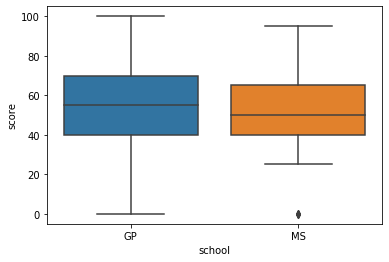

In [4]:
sns.boxplot(y = 'score', x = 'school', data=stud)

Ученики распределены по 2 школам, большая часть из них в GP, поэтому с высокой вероятностью, этот фактор не будет оказывать сущетсвенное влияние на результаты по математике каждого школьника. Исходя из данных о датасете, признак категориальный и пропусков не имеет.

# 2.sex - пол ученика ('F' - женский, 'M' - мужской)

Посмотрим распределение учеников по полу:

In [5]:
pd.DataFrame(stud.sex.value_counts())

,sex
F,208
M,187


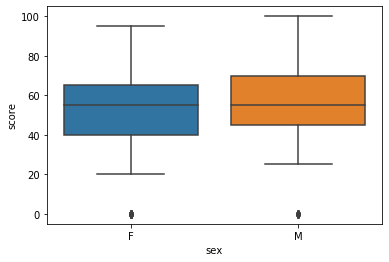

In [6]:
sns.boxplot(y = 'score', x = 'sex', data=stud)

Признак категориальный. Пропусков и выбросов нет. 

# 3. age - возраст ученика (от 15 до 22)

Посмотрим распределение учеников по возрасту. Этот столбец числовой и без пропусков. Поэтому посмотрим на его распределение:

In [7]:
pd.DataFrame(stud.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

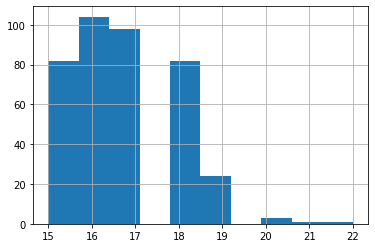

In [8]:
stud.age.hist()
stud.age.describe()

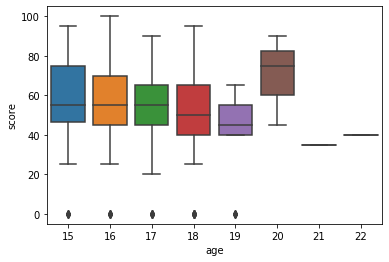

In [9]:
sns.boxplot(y = 'score', x = 'age', data=stud)

Как видно, основаная масса учеников в возрасте от 15 до 17 лет, по условию возраст учеников от 15 до 22 лет, значит выбросов нет.

# 4. address - тип адреса ученика ('U' - городской, 'R' - за городом)

Посмотрим распределение учеников по месту жительсва

In [10]:
pd.DataFrame(stud.address.value_counts())

,address
U,295
R,83


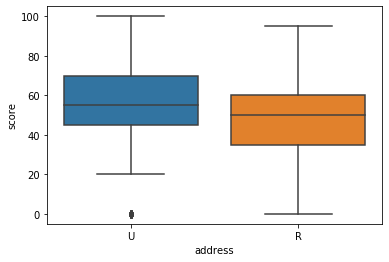

In [11]:
sns.boxplot(y = 'score', x = 'address', data=stud)

In [12]:
display(stud.address.describe())
print(f'Данный признак содержит {stud.address.isnull().sum()} пропусков')

count     378
unique      2
top         U
freq      295
Name: address, dtype: object

Данный признак содержит 17 пропусков


Посмотрим на эти пропуски:

In [13]:
display(stud[stud.address.isnull()])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
52,GP,M,15,NaN,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
96,GP,M,16,NaN,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,-3.0,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
168,GP,F,16,NaN,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,1.0,5.0,4.0,0.0,0.0
241,GP,M,17,NaN,LE3,A,4.0,4.0,teacher,other,course,mother,NaN,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0
254,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN


Предположим, что зная школу, в которой учится ученик и зная его время в пути до школы, мы сможем сделать вывод живет ли он в городе или за городом. Для этого возьмем столбцы 'school', 'address', 'traveltime'.

In [14]:
display(stud[['school', 'address', 'traveltime']].sample(10))

,school,address,traveltime
194,GP,U,2.0
2,GP,U,1.0
278,GP,U,1.0
49,GP,U,1.0
215,GP,U,2.0
384,MS,R,NaN
159,GP,NaN,1.0
32,GP,R,1.0
222,GP,U,1.0
292,GP,NaN,1.0


Посмотрим среднее время, которое ученики затрачивают, чтобы добираться до школы, из разных локаций:

In [15]:
stud.groupby(['address', 'school']).traveltime.mean()

address  school
R        GP        1.672727
         MS        2.190476
U        GP        1.319231
         MS        1.529412
Name: traveltime, dtype: float64

Признак категориальный. Как мы видим из нашего распределения, большая часть учеников живут в городе. Вполне логично, что из города до школ добираться быстрее, что и подтвердил анализ среднего значения времени в дороге. Поэтому заменим пропуски на R, если traveltime > 1, а если traveltime = 1, то на U. Если данные в столбце traveltime отсутсвуют - заменим пропуск на U, как на самое часто встречающееся значение.

In [23]:
stud['address'] = stud.apply(lambda x: ('R' if x.traveltime > 1 else 'U')\
                             if pd.isna(x.address) else x.address , axis=1)

# 5. famsize - размер семьи('LE3' <= 3, 'GT3' >3)

Посмотрим распределение учеников по размеру семьи:

In [24]:
pd.DataFrame(stud.famsize.value_counts())

,famsize
GT3,285
LE3,110


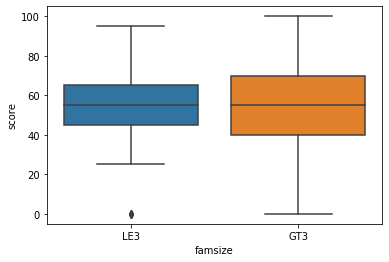

In [25]:
sns.boxplot(y = 'score', x = 'famsize', data=stud)

In [26]:
display(stud.famsize.describe())
print(f'Данный признак содержит {stud.famsize.isnull().sum()} пропусков')

count     395
unique      2
top       GT3
freq      285
Name: famsize, dtype: object

Данный признак содержит 0 пропусков


Посмотрим на 2 признака: размер семьи и живут ли родители ученика вместе или раздельно

In [20]:
stud[['Pstatus', 'famsize']].sample(n = 10)

,Pstatus,famsize
302,T,GT3
351,T,GT3
394,T,LE3
125,T,GT3
107,T,GT3
235,T,NaN
118,T,GT3
175,T,LE3
87,T,GT3
313,NaN,NaN


Предпрложим, что если родители ребенка живут раздельно (А), то семья меньше 3 или 3, а если вместе - то, скорее всего, больше 3 человек. Поскольку подавляющее число значений в данном столбце GT3 (семья более 3 человек) и если данных о совменстном или раздельном проживании родителей отсутствуют, в этом случае, заменим пропущенные значения на GT3. Признак категориальный.

In [27]:
stud['famsize'] = stud.apply(lambda x: ('LE3' if x.Pstatus == 'A' else 'GT3')\
                             if pd.isna(x.famsize) else x.famsize , axis=1)

# 6.Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [28]:
pd.DataFrame(stud.Pstatus.value_counts())

,Pstatus
T,314
A,36


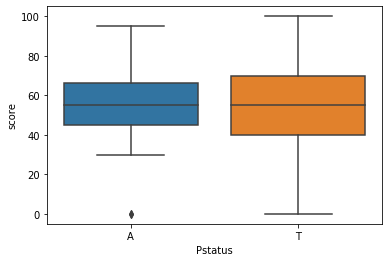

In [29]:
sns.boxplot(y = 'score', x = 'Pstatus', data=stud)

In [983]:
display(stud.Pstatus.describe())
print(f'Данный признак содержит {stud.Pstatus.isnull().sum()} пропусков')

count     350
unique      2
top         T
freq      314
Name: Pstatus, dtype: object

Данный признак содержит 45 пропусков


Признак категориальный. Выбросов нет. Пропусков более 10% от всех данных. Произведем замены пропусков в соответсвии с количеством членов семьи - если семьям более 3 человек, будем считать, что родители живут вместе, и наоборот.

In [30]:
stud['Pstatus'] = stud.apply(lambda x: ('T' if x.famsize == 'GT3' else 'A')\
                             if pd.isna(x.Pstatus) else x.Pstatus , axis=1)
stud.Pstatus.describe()

count     395
unique      2
top         T
freq      346
Name: Pstatus, dtype: object

# 7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [31]:
pd.DataFrame(stud.Medu.value_counts())

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

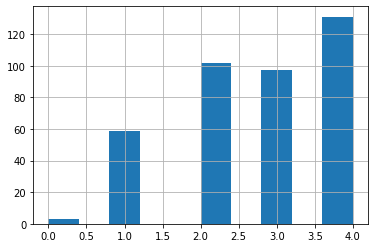

In [32]:
stud.Medu.hist()
stud.Medu.describe()

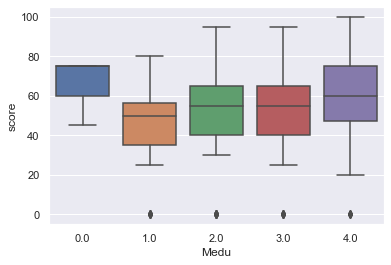

In [987]:
sns.boxplot(y = 'score', x = 'Medu', data=stud)

In [988]:
print(f'Данный признак содержит {stud.Medu.isnull().sum()} пропуска')

Данный признак содержит 3 пропуска


Признак категориальный. Как мы видим из описания, выбросов нет, наибольшее число родителей имеют высшее образовании, среднее значение 2.75, без образования всего 1% родителей, поэтому пропуски заменим на 3.0 - ближайшее к среднему.

In [33]:
stud.Medu = stud.Medu.fillna(3.0)
stud.Medu.describe()

count    395.000000
mean       2.751899
std        1.094154
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

# 8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [34]:
pd.DataFrame(stud.Fedu.value_counts())

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

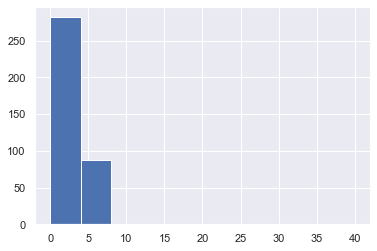

In [991]:
stud.Fedu.hist()
stud.Fedu.describe()

Признак категориальный. Как мы видим, у наших признаков есть выброс - значение 40, все оставльные значения от 0 до 4. Скорее всего, это техническая ошибка и вместо 40 должно было быть число 4. Сделаем замену выброса.

count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

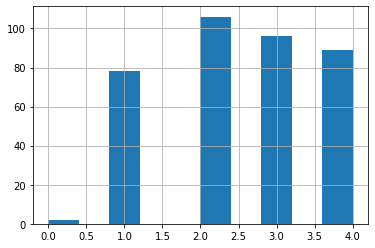

In [35]:
stud.loc[stud['Fedu'] == 40, ["Fedu"]] = 4
stud.Fedu.hist()
stud.Fedu.describe()

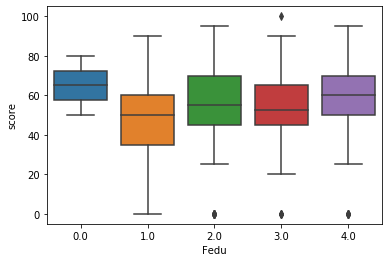

In [36]:
sns.boxplot(y = 'score', x = 'Fedu', data=stud)

In [37]:
print(f'Данный признак содержит {stud.Fedu.isnull().sum()} пропуска')

Данный признак содержит 24 пропуска


В этом признаке встречается больше пропусков, чем в образовании матерей. Порассуждаем из-за чего в этом столбце могут быть пропуски: 
1) У ребенка полная семья, но по каким-то причинам в его анкете не указано образование
2) Отец не давно живет с семьей, поэтому этих данных нет
3) У отца нет образования, семья постеснялась об этом сказать
Все эти причины могут быть равновероятны. 
Посмотрим есть ли зависимость признака образование отца от признака образование матери:

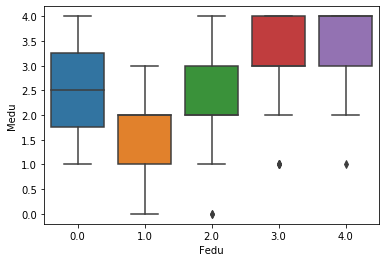

In [38]:
sns.boxplot(y = stud.Medu, x = 'Fedu', data=stud)

Посмтрим на среднее значение образования отцов, сгруппировав из по значениям образования матерей.

In [39]:
stud.groupby(['Medu']).Fedu.mean()

Medu
0.0    1.666667
1.0    1.446429
2.0    2.040816
3.0    2.612903
4.0    3.347107
Name: Fedu, dtype: float64

Как мы видим, по статистике в среднем у отца и матери приблизительно похожий уровень образования, поэтому пропуски в образовании отца предлагаю заменить на значение образования матери. Думаю, уровень образования родителей, в среднем, должен оказывать одинаковое влияние на успеваемость ученика

In [40]:
stud['Fedu'] = stud.apply(lambda x: x.Medu if pd.isna(x.Fedu) else x.Fedu , axis=1)
stud.Fedu.describe()

count    395.000000
mean       2.546835
std        1.092061
min        0.000000
25%        2.000000
50%        3.000000
75%        3.500000
max        4.000000
Name: Fedu, dtype: float64

Введем еще один признак: среднее образование матери и отца, которое будет показывать средний уровень образования обоих родителей.

In [41]:
stud['Medu_Fedu_mean'] = (stud['Fedu'] + stud['Medu']) / 2
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,Medu_Fedu_mean
0,GP,F,18,U,LE3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0,4.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0,1.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0,1.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0,3.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0,3.0


# 9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [42]:
pd.DataFrame(stud.Mjob.value_counts())

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


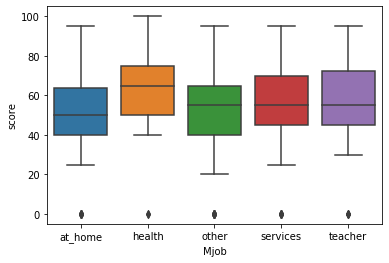

In [43]:
sns.boxplot(y = 'score', x = 'Mjob', data=stud)

In [44]:
display(stud.Mjob.describe())
print(f'Данный признак содержит {stud.Mjob.isnull().sum()} пропусков')

count       376
unique        5
top       other
freq        133
Name: Mjob, dtype: object

Данный признак содержит 19 пропусков


Признак категориальный. Поскольку сферу деятельности мамы в случаях пропусках не представляется возможным определить, заменим пропуски на значение "other", тем более, что оно самое популярное.

In [46]:
stud.Mjob = stud.Mjob.fillna("other")
stud.Mjob.describe()

count       395
unique        5
top       other
freq        152
Name: Mjob, dtype: object

# 10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [47]:
pd.DataFrame(stud.Fjob.value_counts())

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


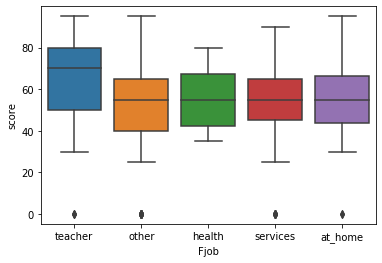

In [49]:
sns.boxplot(y = 'score', x = 'Fjob', data=stud)

In [50]:
display(stud.Fjob.describe())
print(f'Данный признак содержит {stud.Fjob.isnull().sum()} пропусков')

count       359
unique        5
top       other
freq        197
Name: Fjob, dtype: object

Данный признак содержит 36 пропусков


Признак категориальный. Как и в предыдущем признаке, заменим пропуски на "other":

In [51]:
stud.Fjob = stud.Fjob.fillna("other")
stud.Fjob.describe()

count       395
unique        5
top       other
freq        233
Name: Fjob, dtype: object

# 11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [52]:
pd.DataFrame(stud.reason.value_counts())

,reason
course,137
home,104
reputation,103
other,34


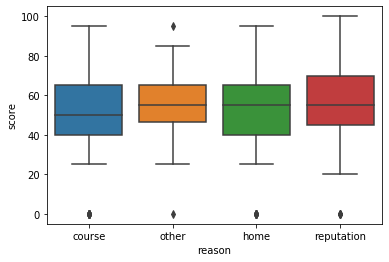

In [53]:
sns.boxplot(y = 'score', x = 'reason', data=stud)

In [54]:
display(stud.reason.describe())
print(f'Данный признак содержит {stud.reason.isnull().sum()} пропусков')

count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

Данный признак содержит 17 пропусков


Признак категориальный. Поскольку точно причины вместо пропуска мы уже не установим, а причина выбора школы, на мой взгляд, имеет существенное влияние на успеваемость ученика, заменим пропуски на "other":

In [55]:
stud.reason = stud.reason.fillna("other")
stud.reason.describe()

count        395
unique         4
top       course
freq         137
Name: reason, dtype: object

# 12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [56]:
pd.DataFrame(stud.guardian.value_counts())

,guardian
mother,250
father,86
other,28


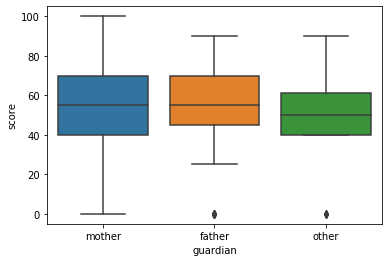

In [57]:
sns.boxplot(y = 'score', x = 'guardian', data=stud)

In [58]:
display(stud.guardian.describe())
print(f'Данный признак содержит {stud.guardian.isnull().sum()} пропуск')

count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

Данный признак содержит 31 пропуск


Признак категориальный. Исходя из здравого смысла и из наших данных, чаще всего опекуном ребенка является мать, поэтому пропуски заменим на "mother":

In [59]:
stud.guardian = stud.guardian.fillna("mother")
stud.guardian.describe()

count        395
unique         3
top       mother
freq         281
Name: guardian, dtype: object

# 13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [60]:
pd.DataFrame(stud.traveltime.value_counts())

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


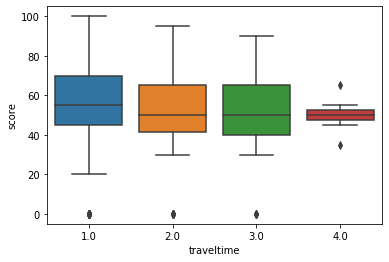

In [64]:
sns.boxplot(y = 'score', x = 'traveltime', data=stud)

In [65]:
stud.traveltime.describe()

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

In [66]:
print(f'Данный признак содержит {stud.traveltime.isnull().sum()} пропусков')

Данный признак содержит 28 пропусков


Посмотрим на среднее время ученика в пути до школы, в зависимости от адреса ученика и школы:

In [67]:
stud.groupby(['address', 'school']).traveltime.mean()

address  school
R        GP        1.684211
         MS        2.200000
U        GP        1.309701
         MS        1.529412
Name: traveltime, dtype: float64

Признак категориальный. Как мы видим, выбросов нет, исходя из здравого смысла, родители чаще выбирают для детей школу рядом с домом, поэтому 1 преобладает. Также вполне догично, что когда ребенок ездит в городскую школу из загородного жома, то его время в пути увеличивается, поэтому считаю справедливым заменить пропуски на 1, если у ученика городской адрес, и заменить пропуск на 2 (исходя из средних значений), если ученик проживает за городом.

In [68]:
stud['traveltime'] = stud.apply(lambda x: (2 if x.address == 'R' else 1)\
                             if pd.isna(x.traveltime) else x.traveltime , axis=1)

# 14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [69]:
pd.DataFrame(stud.studytime.value_counts())

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

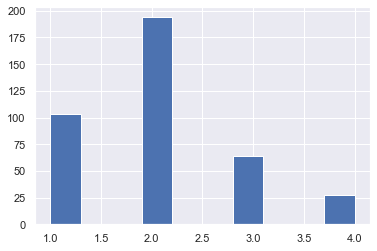

In [1023]:
stud.studytime.hist()
stud.studytime.describe()

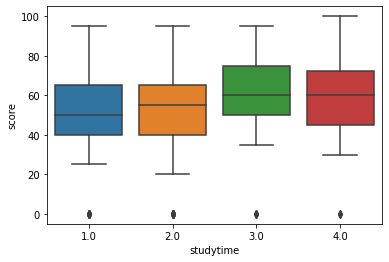

In [70]:
sns.boxplot(y = 'score', x = 'studytime', data=stud)

In [71]:
print(f'Данный признак содержит {stud.studytime.isnull().sum()} пропусков')

Данный признак содержит 7 пропусков


Признак категориальный. Судя по распределению, выбросов нет. Пропуски заменим на самое частое значение - 2.

In [72]:
stud.studytime = stud.studytime.fillna(2)
stud.studytime.describe()

count    395.000000
mean       2.037975
std        0.834580
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

# 15. failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)

In [73]:
pd.DataFrame(stud.failures.value_counts())

,failures
0.0,293
1.0,49
2.0,16
3.0,15


count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

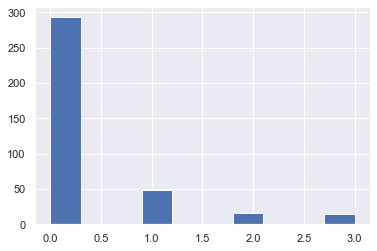

In [1028]:
stud.failures.hist()
stud.failures.describe()

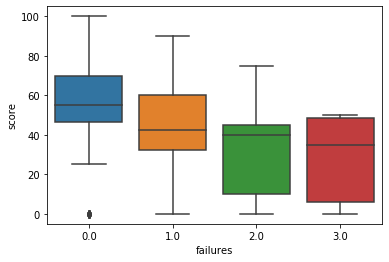

In [74]:
sns.boxplot(y = 'score', x = 'failures', data=stud)

In [76]:
print(f'Данный признак содержит {stud.failures.isnull().sum()} пропуска')

Данный признак содержит 0 пропуска


Признак категориальный. Судя по распределнию, выбросов нет, у проеобладающего числа учеников нет внеучебных неудач, что не может не радовать) Заменим пропуски на среднее значение, а оно близко к 0. На боксплотах хорошо видна корреляция признака и целевой переменной.

In [77]:
stud.failures = stud.failures.fillna(0)
stud.failures.describe()

count    395.000000
mean       0.318987
std        0.726244
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

# 16 schoolsup — дополнительная образовательная поддержка (yes или no)

In [78]:
pd.DataFrame(stud.schoolsup.value_counts())

,schoolsup
no,335
yes,51


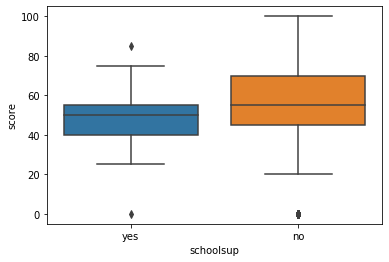

In [79]:
sns.boxplot(y = 'score', x = 'schoolsup', data=stud)

In [80]:
print(f'Данный признак содержит {stud.schoolsup.isnull().sum()} пропусков')

Данный признак содержит 9 пропусков


Признак категориальный, не сожержит выбросов, пропуски заменим на самое популярное значение - no.

In [81]:
stud.schoolsup = stud.schoolsup.fillna("no")
stud.schoolsup.describe()

count     395
unique      2
top        no
freq      344
Name: schoolsup, dtype: object

# 17. famsup — семейная образовательная поддержка (yes или no)

In [82]:
pd.DataFrame(stud.famsup.value_counts())

,famsup
yes,219
no,137


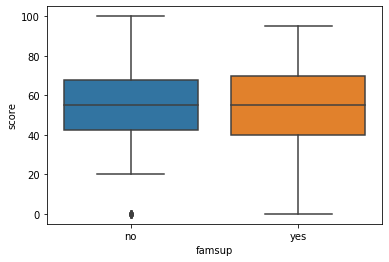

In [83]:
sns.boxplot(y = 'score', x = 'famsup', data=stud)

In [84]:
print(f'Данный признак содержит {stud.famsup.isnull().sum()} пропусков')

Данный признак содержит 39 пропусков


Признак категориальный. Посмотрим на признаки семейная образовательная поддержка и средний уровень образования родителей.

famsup               
no      (0.996, 2.5]      89
        (2.5, 4.0]        48
yes     (2.25, 4.0]      148
        (0.495, 2.25]     71
Name: Medu_Fedu_mean, dtype: int64

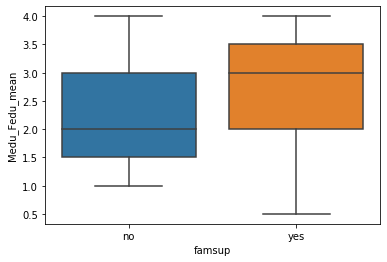

In [86]:
display(stud.groupby(['famsup'])['Medu_Fedu_mean'].value_counts(bins=2))
sns.boxplot(y = 'Medu_Fedu_mean', x = 'famsup', data=stud)

Исходя из полученной информации, думаю, справедливо будет предположить, что если уровень образования родетелей больше или равен 2, то ученик чаще получает семейную образовательную поддержку, если меньше 2, то реже. Заменим пропуски в соответствии с нашим предположением.

In [87]:
stud['famsup'] = stud.apply(lambda x: ('yes' if x.Medu_Fedu_mean >= 2 else 'no')\
                             if pd.isna(x.famsup) else x.famsup , axis=1)
stud.famsup.describe()

count     395
unique      2
top       yes
freq      248
Name: famsup, dtype: object

# 18. paid — дополнительные платные занятия по математике (yes или no)

In [88]:
pd.DataFrame(stud.paid.value_counts())

,paid
no,200
yes,155


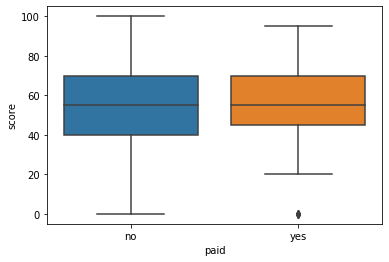

In [89]:
sns.boxplot(y = 'score', x = 'paid', data=stud)

In [1042]:
print(f'Данный признак содержит {stud.paid.isnull().sum()} пропусков')

Данный признак содержит 40 пропусков


Признак категориальныйПоскольку пропусков около 10% и достаточно сложно сделать предположение о том, почему ученик посещает или не посещает платные занятия по математике (может быть, ему хватает школьной программы, или он хочет стать дизайнером или историком, например, поэтому математика не так важна, а, возможно, у родителей просто нет денег, чтобы их ребенок посещал платные занятия). Выделим их в отдельную категорию "other".

In [90]:
stud.paid = stud.paid.fillna("other")
stud.paid.describe()

count     395
unique      3
top        no
freq      200
Name: paid, dtype: object

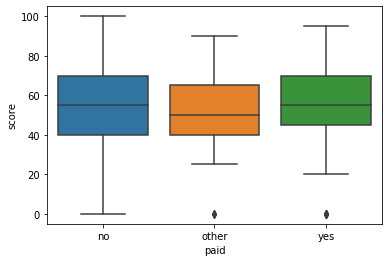

In [91]:
sns.boxplot(y = 'score', x = 'paid', data=stud)

# 19. activities — дополнительные внеучебные занятия (yes или no)

In [92]:
pd.DataFrame(stud.activities.value_counts())

,activities
yes,195
no,186


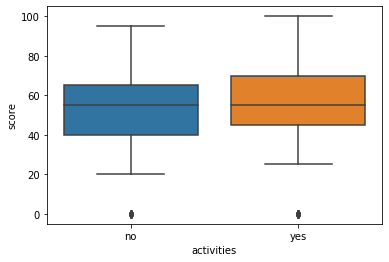

In [93]:
sns.boxplot(y = 'score', x = 'activities', data=stud)

In [94]:
print(f'Данный признак содержит {stud.activities.isnull().sum()} пропусков')

Данный признак содержит 14 пропусков


Признак категориальный. Количество учеников, которые посещают дополнительные внеучебные занятия практически равно количетву учеников, которые эти занятяи не посещают. Пропусков у нас менее 10%, поэтому, думаю, будет справедливым рандомное заполнение пропусков на yes и no.

In [95]:
import random
stud.activities = stud.activities.fillna(random.choice(['yes', 'no']))
pd.DataFrame(stud.activities.value_counts())

,activities
yes,209
no,186


# 20. nursery — посещал детский сад (yes или no)

In [96]:
pd.DataFrame(stud.nursery.value_counts())

,nursery
yes,300
no,79


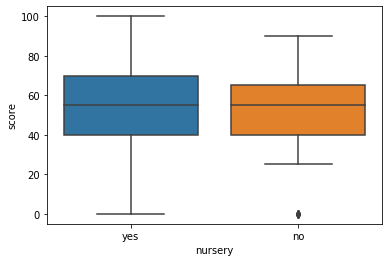

In [97]:
sns.boxplot(y = 'score', x = 'nursery', data=stud)

In [98]:
print(f'Данный признак содержит {stud.nursery.isnull().sum()} пропусков')

Данный признак содержит 16 пропусков


Признак категориальный. По нашим данным большая часть учеников посещала детский сад, поэтому заменим пропуски на самое часто встречающееся значение:

In [99]:
stud.nursery = stud.nursery.fillna('yes')
stud.nursery.describe()

count     395
unique      2
top       yes
freq      316
Name: nursery, dtype: object

# 21. studytime, granular


Рассмотрим признак, которого у нас нет в общем описании данных.

In [100]:
pd.DataFrame(stud['studytime, granular'].value_counts())

,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27


7

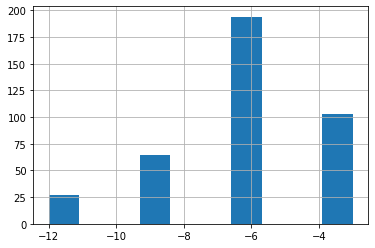

In [101]:
stud['studytime, granular'].hist()
stud['studytime, granular'].isnull().sum()

In [102]:
stud['studytime, granular'].describe()

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

Попробуем сравнить наш признак studytime, granular с признаком studytime:

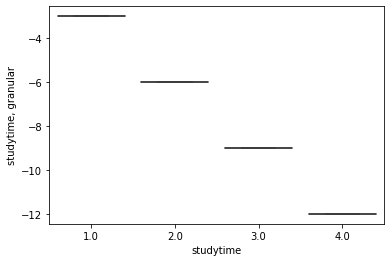

In [103]:
sns.boxplot(y = 'studytime, granular', x = 'studytime', data=stud)

count    388.0
mean      -3.0
std        0.0
min       -3.0
25%       -3.0
50%       -3.0
75%       -3.0
max       -3.0
Name: stdtime_gr, dtype: float64

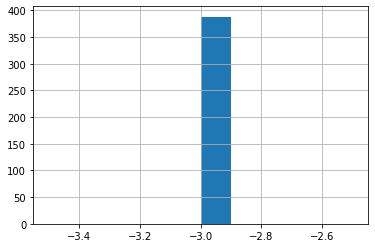

In [104]:
stud['stdtime_gr'] = stud['studytime, granular'] / stud['studytime']  
stud['stdtime_gr'].hist()  
stud['stdtime_gr'].describe()

Признаки полностью скоррелированы, studytime, granular получен путем умножения значений признака studytime на константу -3. Могу предположить, что это сделано для того, чтобы увеличить расстояние между значениями, и, возможно, ярче подсветить влияние признака studytime на целевую переменную. В соответствии со сделанным нами выводом, заполним пропуски в рассматриваемом признаке, умножив соответсвующие значния признака studytime на -3.

In [105]:
stud['studytime, granular'] = stud.apply(lambda x: (-3) * x.studytime\
                             if pd.isna(x['studytime, granular']) else x['studytime, granular'] , axis=1)
stud['studytime, granular'].describe()

count    395.000000
mean      -6.113924
std        2.503740
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

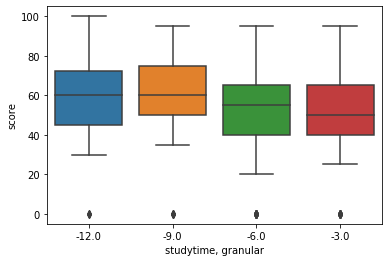

In [106]:
sns.boxplot(y = 'score', x = 'studytime, granular', data=stud)

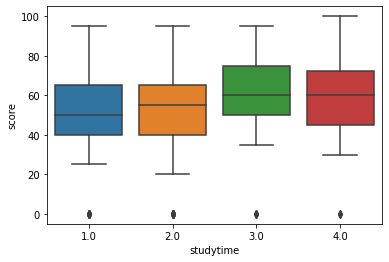

In [107]:
sns.boxplot(y = 'score', x = 'studytime', data=stud)

Поскольку столбец stdtime_gr у нас заполнен константным значением -3, его можно удалить:

In [108]:
del stud['stdtime_gr']

# 22. higher — хочет получить высшее образование (yes или no)

In [109]:
pd.DataFrame(stud.higher.value_counts())

,higher
yes,356
no,19


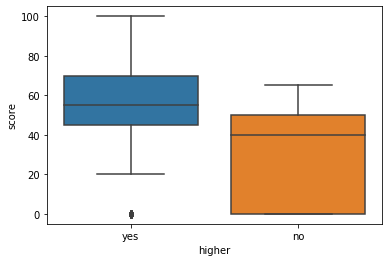

In [110]:
sns.boxplot(y = 'score', x = 'higher', data=stud)

In [111]:
print(f'Данный признак содержит {stud.higher.isnull().sum()} пропусков')

Данный признак содержит 20 пропусков


Признак категориальный. Судя по нашим данным, подавляющее большинство школьников хотят получить высшее образование, что вполне логично) Заменим пропуски на самое часто встречающееся "yes". 

In [113]:
stud.higher = stud.higher.fillna('yes')
stud.higher.describe()

count     395
unique      2
top       yes
freq      376
Name: higher, dtype: object

Признак имеет сильное влияние на целевую переменную.

# 23. internet — наличие интернета дома (yes или no)

In [114]:
pd.DataFrame(stud.internet.value_counts())

,internet
yes,305
no,56


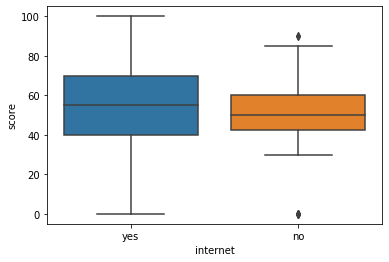

In [115]:
sns.boxplot(y = 'score', x = 'internet', data=stud)

In [116]:
print(f'Данный признак содержит {stud.internet.isnull().sum()} пропусков')

Данный признак содержит 34 пропусков


Признак категориальный. Поскольку мы живем в эпоху интернета и, по нашим данным, у большинства учеников интернет есть, заменим пропуски на самое часто втречающееся значение "yes"

In [117]:
stud.internet = stud.internet.fillna('yes')
stud.internet.describe()

count     395
unique      2
top       yes
freq      339
Name: internet, dtype: object

# 24. romantic — в романтических отношениях (yes или no)

In [118]:
pd.DataFrame(stud.romantic.value_counts())

,romantic
no,240
yes,124


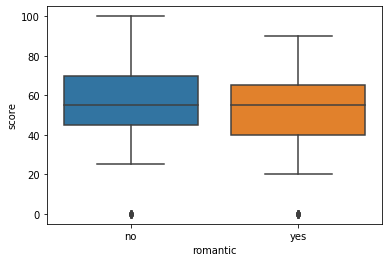

In [119]:
sns.boxplot(y = 'score', x = 'romantic', data=stud)

In [1072]:
print(f'Данный признак содержит {stud.romantic.isnull().sum()} пропуск')

Данный признак содержит 31 пропуск


Признак категориальный, интересный, достаточно сложно предсказуемый, поэтому заменим пропуски на самый часто встречающийся ответ 'no', думаю, он будет не далек от истины. И, в итоге, посмотрим, как вообще наша целевая переменная зависит от этого параметра.

In [120]:
stud.romantic = stud.romantic.fillna('no')
stud.romantic.describe()

count     395
unique      2
top        no
freq      271
Name: romantic, dtype: object

# 25. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [121]:
pd.DataFrame(stud.famrel.value_counts())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

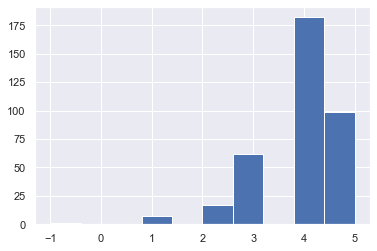

In [1076]:
#Посотрим на графическое распредение признака:
stud.famrel.hist()
stud.famrel.describe()

Признак категориальный. Мы видим выброс на диаграмме -1. В нашем списке значений такого значения нет, да и не хочется представлять семью, у которой все настолько плохо, что семейным отношениям можно поставить оценку -1. Скорее всего, это техническая ошибка, и значение должно быть равно 1.

count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

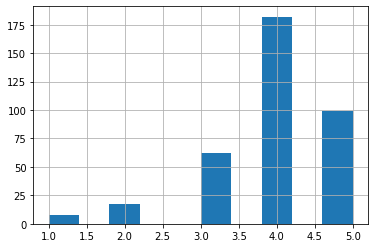

In [122]:
stud.loc[stud['famrel'] == -1, ["famrel"]] = 1
stud.famrel.hist()
stud.famrel.describe()

Это распределение показывает нам, что в большинстве семей все таки хорошие отношения на уровне 4.

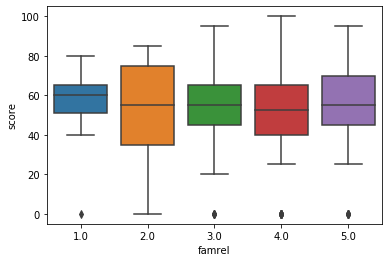

In [123]:
sns.boxplot(y = 'score', x = 'famrel', data=stud)

In [124]:
print(f'Данный признак содержит {stud.famrel.isnull().sum()} пропусков')

Данный признак содержит 27 пропусков


Заменим пропуски на среднее значение, которое близко к 4.

In [125]:
stud.famrel = stud.famrel.fillna(4)
stud.famrel.describe()

count    395.000000
mean       3.946835
std        0.872425
min        1.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: famrel, dtype: float64

# 26. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [126]:
pd.DataFrame(stud.freetime.value_counts())

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

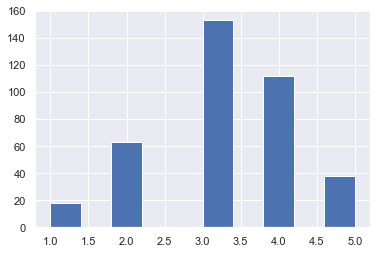

In [1082]:
#Посотрим на графическое распредение признака:
stud.freetime.hist()
stud.freetime.describe()

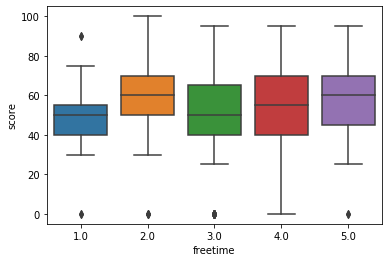

In [127]:
sns.boxplot(y = 'score', x = 'freetime', data=stud)

In [1083]:
print(f'Данный признак содержит {stud.freetime.isnull().sum()} пропусков')

Данный признак содержит 11 пропусков


Признак категориальный, у него норамльное распределение, выбросов нет, картина вполне реалистичная, что у школьников в основной массе не очень много свободного времени после учебы, но все таки оно есть. Поскольку пропусков около 3%, заменим из на среднее значение - 3.

In [128]:
stud.freetime = stud.freetime.fillna(3)
stud.freetime.describe()

count    395.000000
mean       3.225316
std        0.980711
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

# 27. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [129]:
pd.DataFrame(stud.goout.value_counts())

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

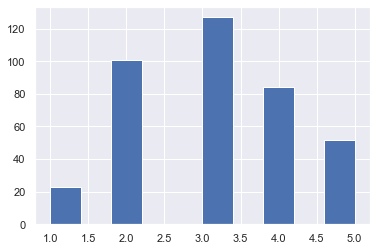

In [1087]:
#Посотрим на графическое распредение признака:
stud.goout.hist()
stud.goout.describe()

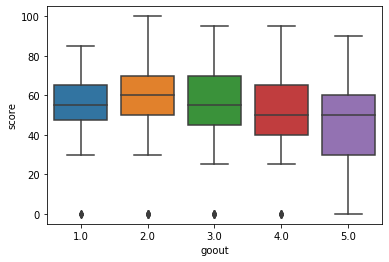

In [130]:
sns.boxplot(y = 'score', x = 'goout', data=stud)

In [1088]:
print(f'Данный признак содержит {stud.goout.isnull().sum()} пропусков')

Данный признак содержит 8 пропусков


Признак категориальный. У признака норамльное распределение, выбросов нет, признак похож на предыдущий, что у школьники соблюдают баланс между временем, занятым учебой и друзьями. Поскольку пропусков меньше 2%, заменим из на среднее значение - 3.

In [131]:
stud.goout = stud.goout.fillna(3)
stud.goout.describe()

count    395.000000
mean       3.103797
std        1.104610
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

Наш график показывает, что школьники, которые больше других проводят времени с друзьями, и, как следствие, меньше времени уделяют учебе, хуже сдают итоговый экзамен, что вполне закономерно. Судя по боксплотам, признак влияет на целевую переменную.

# 28. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [132]:
pd.DataFrame(stud.health.value_counts())

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

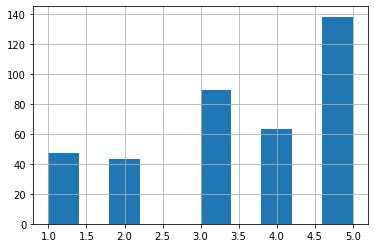

In [133]:
#Посотрим на графическое распредение признака:
stud.health.hist()
stud.health.describe()

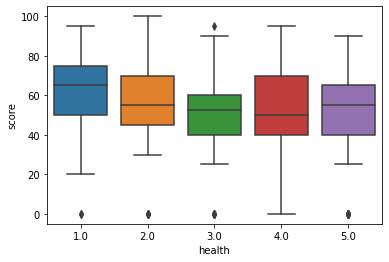

In [134]:
sns.boxplot(y = 'score', x = 'health', data=stud)

In [135]:
print(f'Данный признак содержит {stud.health.isnull().sum()} пропусков')

Данный признак содержит 15 пропусков


Признак категориальный. Радует, что большинство школьников имеют отличное здоровье, выбросов в признаке нет, пропуски заменим на среднее значение, котрое ближе к 4.

In [136]:
stud.health = stud.health.fillna(4)
stud.health.describe()

count    395.000000
mean       3.549367
std        1.372118
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

Судя по диаграмме, здоровье ученика влияет на его итоговую оценку. 

# 29. absences — количество пропущенных занятий

In [137]:
pd.DataFrame(stud.absences.value_counts())

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

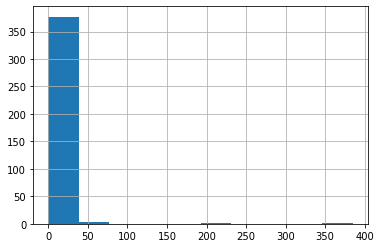

In [138]:
#Посотрим на графическое распредение признака:
stud.absences.hist()
stud.absences.describe()

Видим, что основное распределение расположено около 0 (школьники молодцы, у большинства очень мало пропусков занятий) и есть выбросы. Самый простой способ отфильтровать выбросы — воспользоваться формулой интерквартильного расстояния (межквартильного размаха). Выбросом считаются такие значения, которые лежат вне рамок

percentile(25) -1.5IQR : percentile(75)+1.5IQR, где IQR = percentile(75) - percentile(25).

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


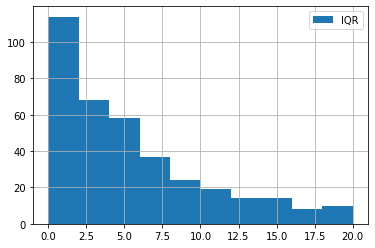

In [139]:
median = stud.absences.median()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 20), 
                                                                                             label = 'IQR')
plt.legend();

Этот способ позволил нам отобрать экстремально экстремально высокие значения признака, которые в дальнейшем могли бы негативно влиять на обучение модели. Отфильтруем данные:

In [140]:
stud = stud.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

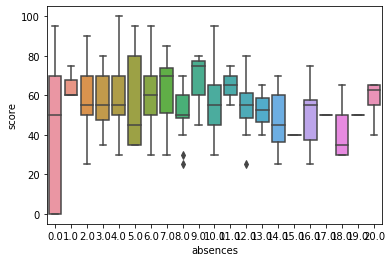

In [141]:
sns.boxplot(y = 'score', x = 'absences', data=stud)

Признак, как и следовало ожтдать, влияет на итоговую оценку на экзамене.

# 30. score — баллы по госэкзамену по математике - наша целевая переменная

Изучим данные:

In [142]:
pd.DataFrame(stud.score.value_counts())

,score
50.0,53
55.0,42
0.0,36
75.0,31
65.0,30
60.0,29
70.0,27
40.0,26
45.0,23
80.0,16


Посмотрим на распределение оценок:

count    361.000000
mean      51.994460
std       22.956117
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

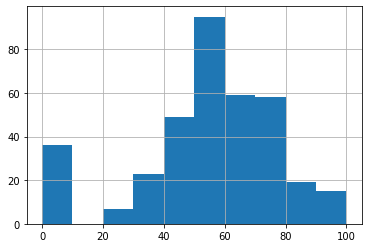

In [143]:
stud.score.hist()
stud.score.describe()

In [145]:
print(f'Целевая переменная содержит {stud.score.isnull().sum()} пропусков')

Целевая переменная содержит 5 пропусков


Целевая переменная, числовая. Как мы видим, большинство оценок распределены между 20 и 100 баллами, что позволяет сделать два предположения:

Скорее всего была использована стобалльная шкала оценивания 
Интересен факт наличия нулей и пропусков в итоговой оценке: откуда они взялись? Мог ли ученик, пришедший на экзамен, набрать 0 баллов? Возможно, 0 - это неявка на экзамен или ученика удалили посла начала экзамена за списывание, например. 
Плюс, у нас есть пропуски. Пропуск - это значит нет данных, возможно их не внесли, возможно что-то не корректно отобразилось при переносе данных в таблицу, но, поскольку, это целевая переменная, и строки, в которых она отсутсует, я считаю, будут не информативны для нашей модели, она не сможет на них обучиться. Если мы заменим их на 0, то картина в целом может слегка исказиться, ведь мы не достоверно знаем, что ученик с такими входными параментами получил 0 на экзамене.  В связи с этим считаю правильным удалить стоки с пропусками в столбце целевой переменной, тем более, их не так много - около 1%.

In [146]:
stud.dropna(subset=['score'], inplace=True)
stud.score.describe()

count    361.000000
mean      51.994460
std       22.956117
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Можно попробовать выделить 0, полученные за экзамен в отдельную колонку, и посмотреть, какие параметры на нее влияют. Создадим бинарный признак, в котором 0 - это 0 баллов за экзамен, и 1 - это оценка больше 0

In [157]:
stud['score_01'] = stud.apply(lambda x: (0 if x.score == 0 else 1), axis=1)
stud[['score', 'score_01']].sample(n = 10)

,score,score_01
124,40.0,1
127,45.0,1
102,70.0,1
299,80.0,1
48,70.0,1
197,50.0,1
310,0.0,0
209,35.0,1
274,50.0,1
94,70.0,1


# Корреляционный анализ

Выясним, какие столбцы коррелируют с итоговой оценкой за госэкзамен по математике. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

Корреляции рассмотрим только для числовых столбцов.

Для быстрого построения графиков зависимости переменных можно воспользоваться функцией pairplot из модуля seaborn:

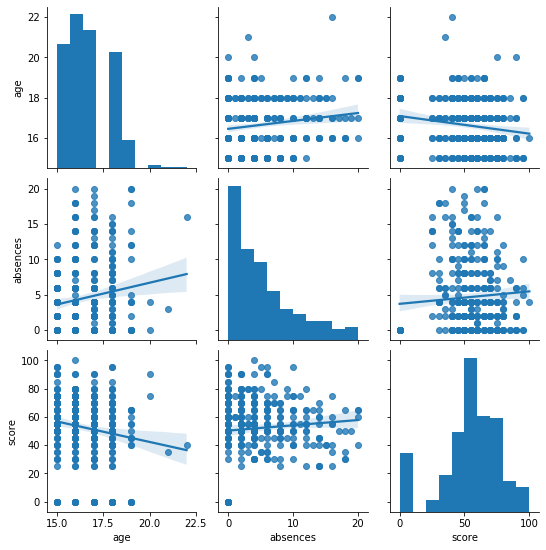

In [147]:
sns.pairplot(stud, vars=['age', 'absences', 'score'], kind = 'reg')

Используем для наглядности матрицу корреляций:

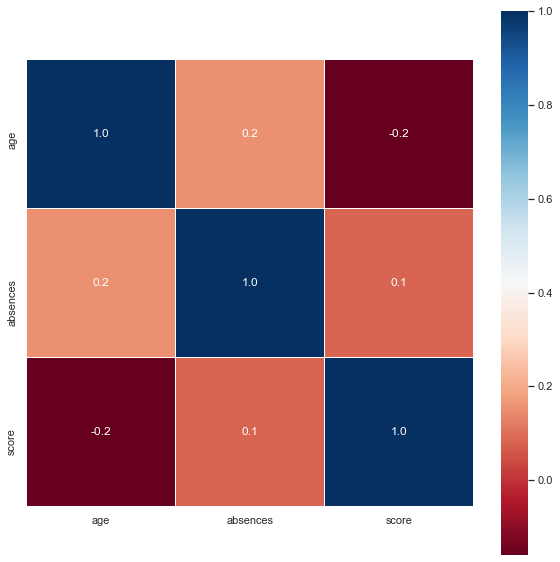

In [149]:
numeric_stud = stud[['age', 'absences', 'score']] #посмотрим корреляцию только по числовым признакам
sns.set(font_scale = 1)
plt.subplots(figsize = (10,10))
sns.heatmap(numeric_stud.corr(), square = True,
           annot = True, fmt = ".1f", linewidths = 0.1, cmap = 'RdBu')

Как мы видим из матрицы корреляций, наши числовые признаки фактически не скоррелированы между собой, а также с целевой переменной. Поэтому считаю правильным оставить все признаки. 

# Анализ номинативных переменных

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли итоговые оценки в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных). Когда мы рассматривали признаки, мы уже строили боксплоты по каждому из них, сейчас соберем все боксплоты воедино и помотрим, какие из номинативных признаков оказывают влияние на нашу целевую переменну.

Номинативные переменные, которые мы рассмотрим: school, sex, address, famsize, Pstatus, Medu, Fedu, Medu_Fedu_mean, Mjob, Fjob, reason, guardian, traveltime,studytime, failures, schoolsup, famsup, paid, activities, nursery, "studytime, granular", higher, 
internet, romantic, famrel, freetime, goout, health    

In [150]:
#Напишем функцию, которая будет строить боксплоты для номинативных переменных

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

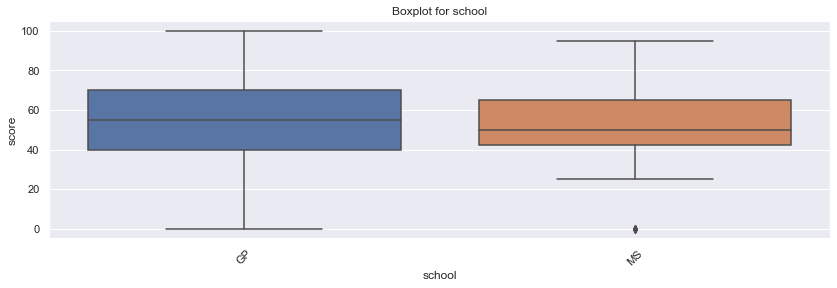

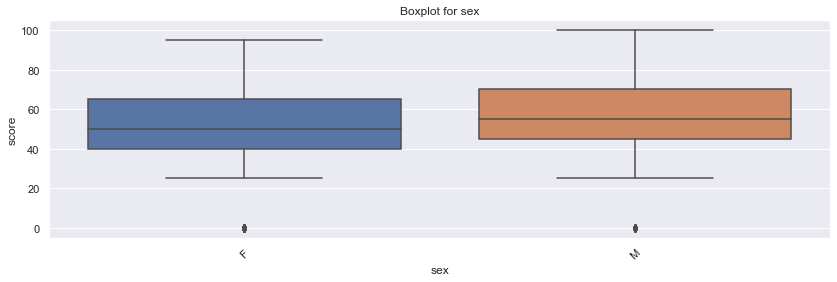

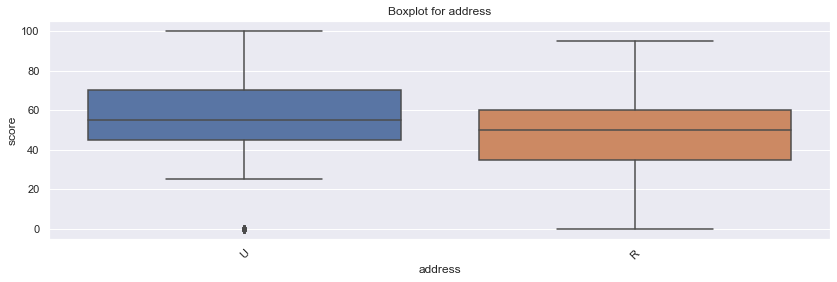

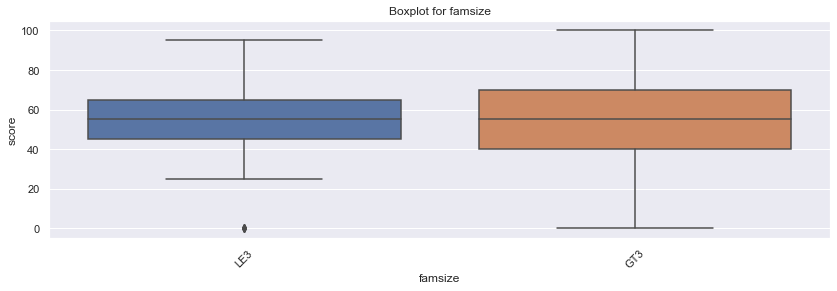

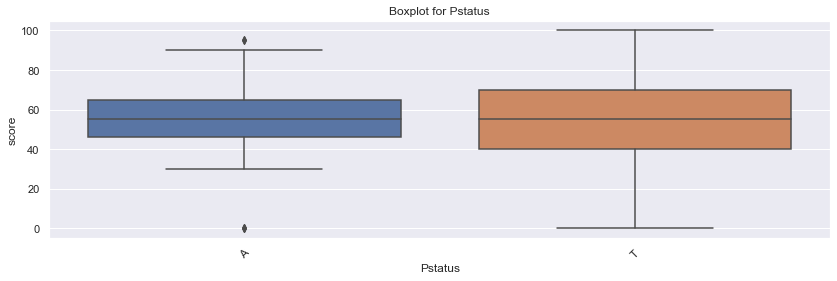

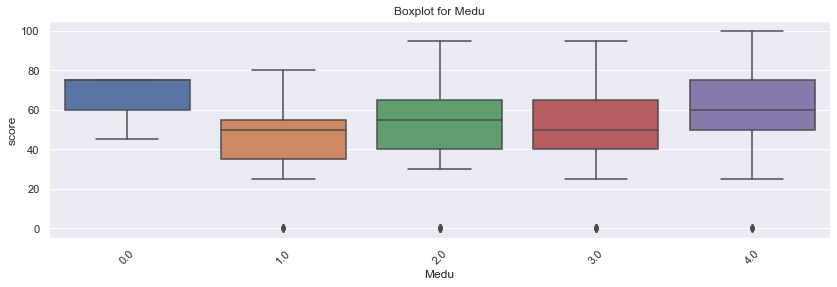

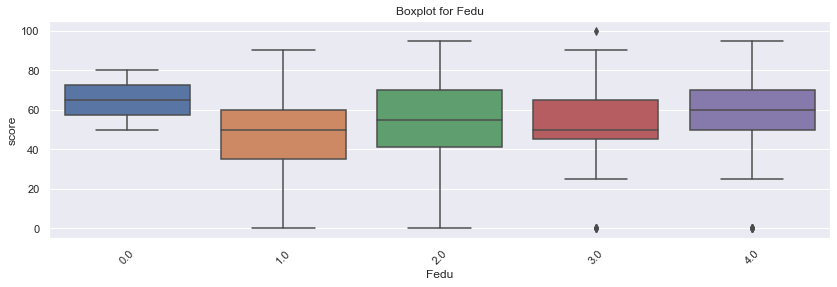

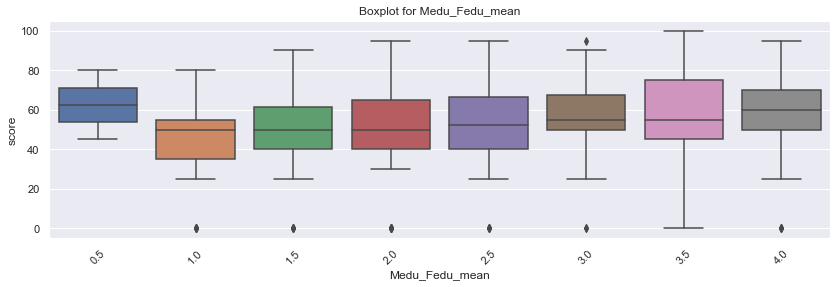

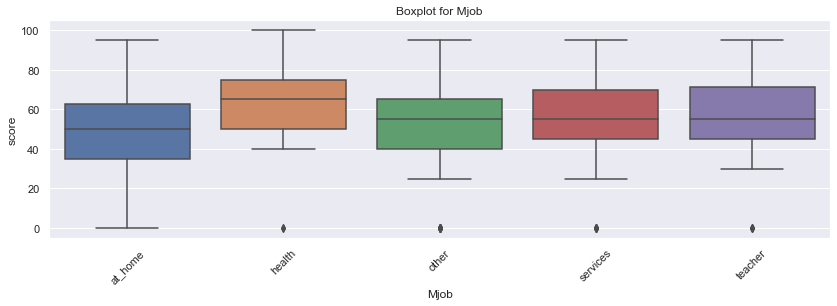

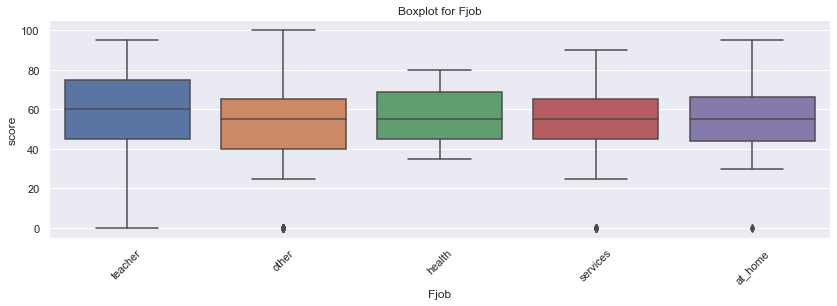

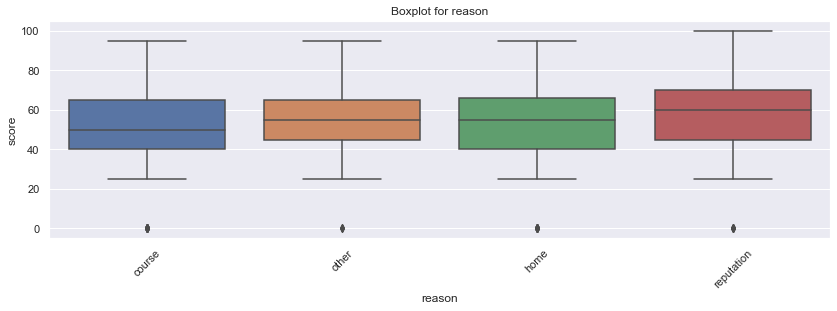

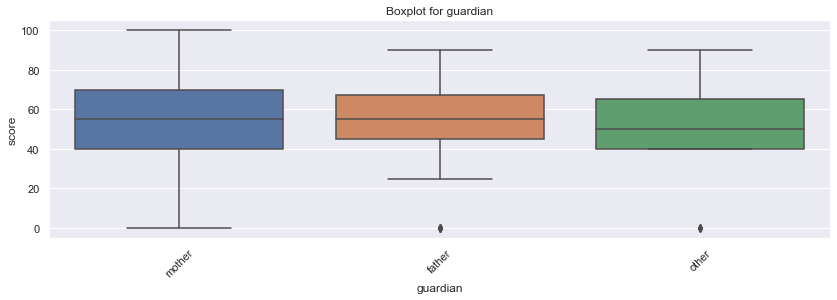

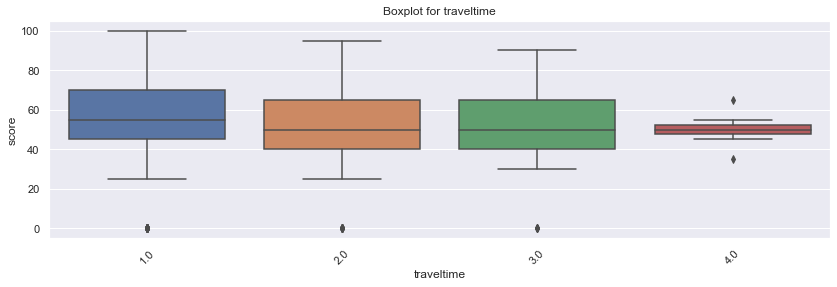

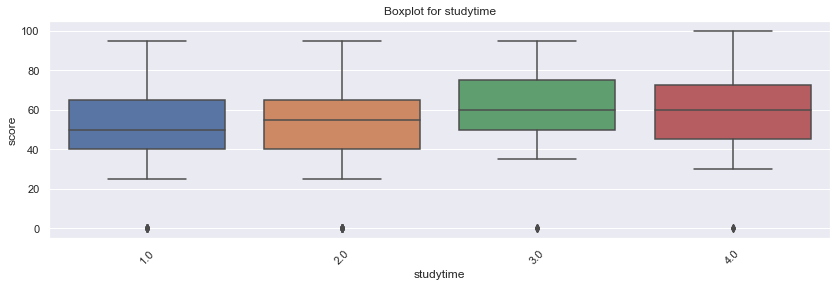

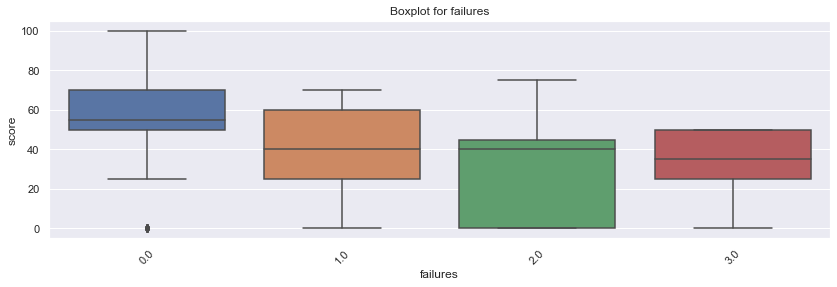

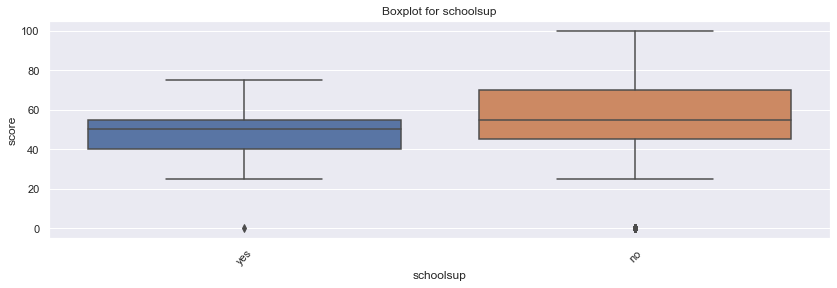

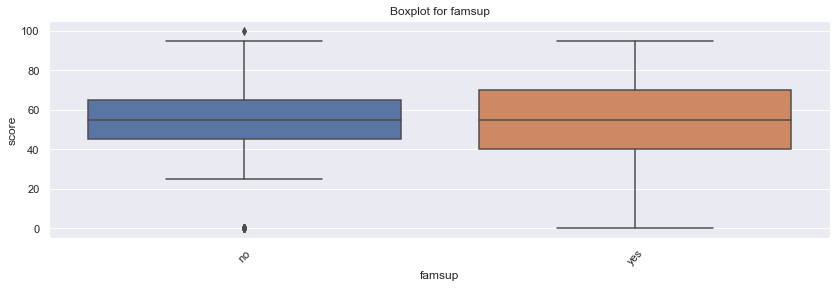

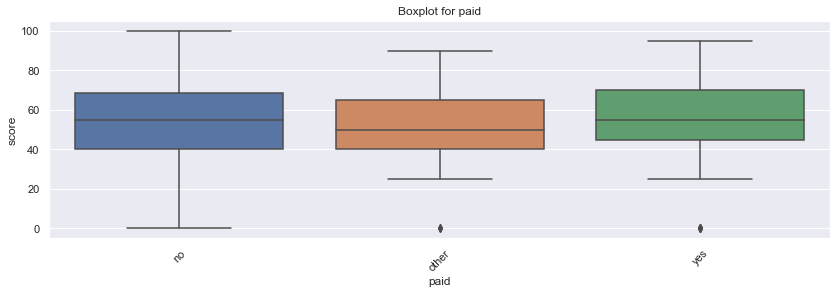

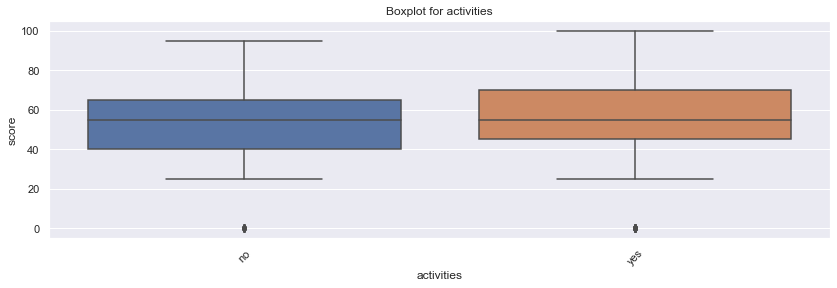

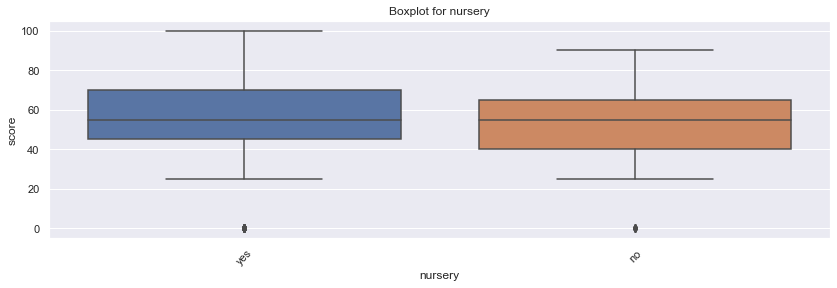

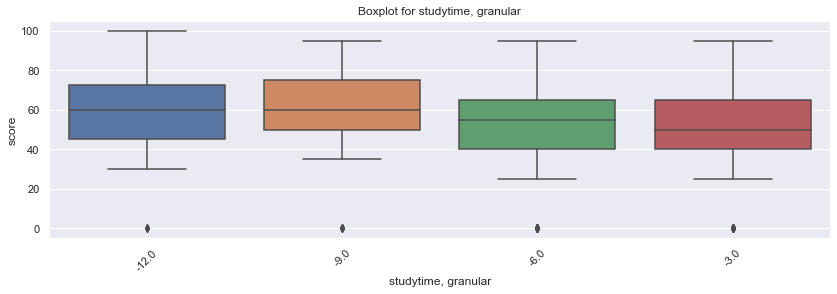

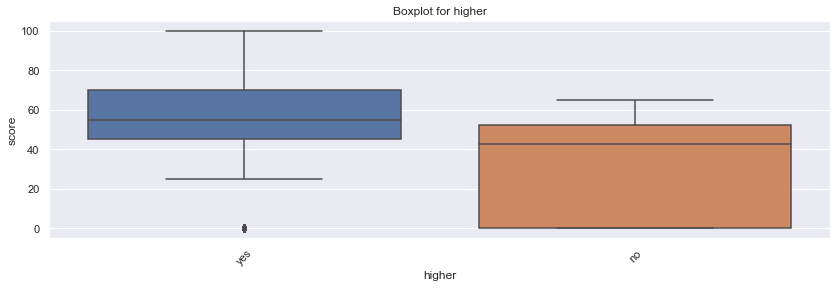

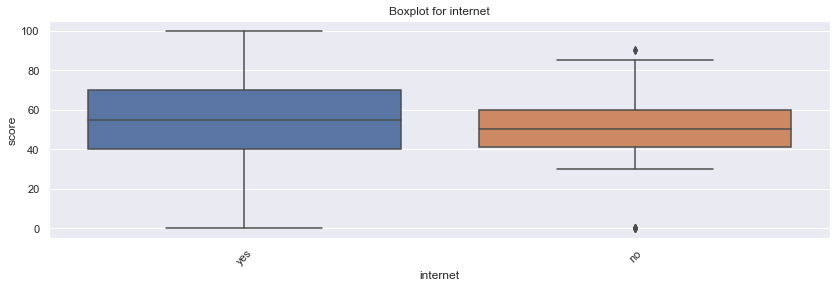

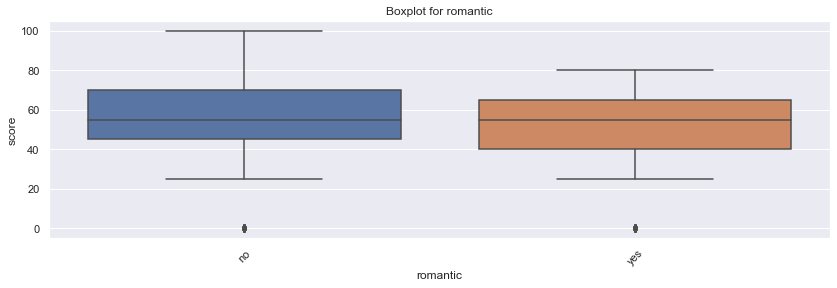

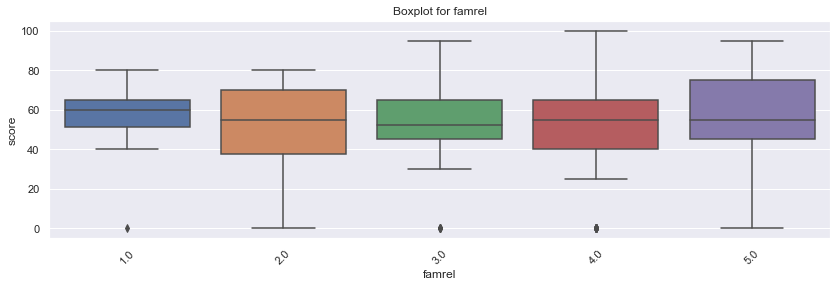

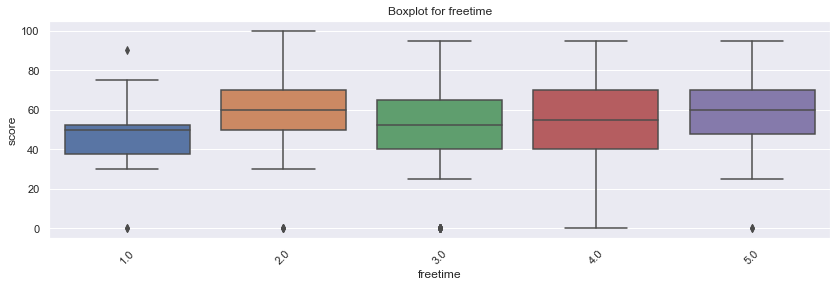

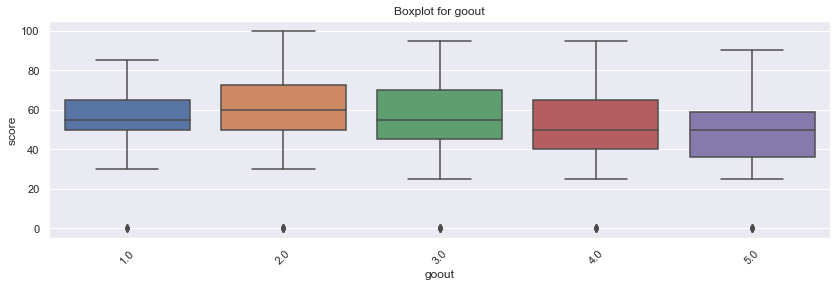

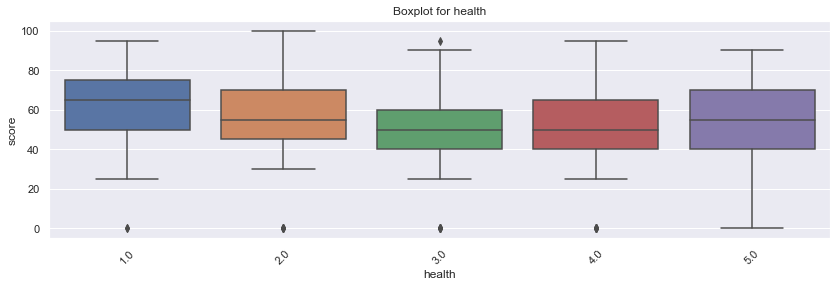

In [151]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Medu_Fedu_mean', 'Mjob',\
            'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',\
            'paid', 'activities', 'nursery', 'studytime, granular', 'higher', 'internet', 'romantic',\
            'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

По графикам похоже, что параметры adress, Medu, Fedu, Medu_Fedu_mean, Mjob, failtures, higer, internet, romantic, freetime, health могут влиять на итоговую оценку на экзамене. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. 

### Проверим, какие признаки достоверно связаны с результатом, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок на экзамене по различным параметрам неразличимы:

In [152]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [154]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Medu_Fedu_mean', 'Mjob',\
            'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',\
            'paid', 'activities', 'nursery', 'studytime, granular', 'higher', 'internet', 'romantic',\
            'famrel', 'freetime', 'goout', 'health', 'age', 'absences']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки absences


Посмотрим, какие признаки будут влиять на факт сдачи или несдачи экзамена (score_01):

In [155]:
def get_stat_dif1(column):
    cols = stud.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score_01'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score_01']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [159]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Medu_Fedu_mean', 'Mjob',\
            'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',\
            'paid', 'activities', 'nursery', 'studytime, granular', 'higher', 'internet', 'romantic',\
            'famrel', 'freetime', 'goout', 'health', 'age', 'absences']:
    get_stat_dif1(col)

Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки absences


Как мы видим, серьёзно отличаются восемь параметров: sex, address, Medu, Mjob, failures, higher, romantic, absences. Также на факт сдачи или не сдачи экзамена оказывает влияние признак paid. Считаю, что его также нужно оставить для построения модели.  Итак, мы нашли важные переменные, которые, возможно, оказывают влияние на оценку.

In [161]:
stud_for_model = stud.loc[:, ['sex', 'address', 'Medu', 'Mjob', 'failures', 'higher', 'romantic', 'absences', 'paid', 'score']]
stud_for_model.head()

,sex,address,Medu,Mjob,failures,higher,romantic,absences,paid,score
0,F,U,4.0,at_home,0.0,yes,no,6.0,no,30.0
1,F,U,1.0,at_home,0.0,yes,no,4.0,no,30.0
2,F,U,1.0,at_home,3.0,yes,no,10.0,other,50.0
3,F,U,4.0,health,0.0,yes,yes,2.0,yes,75.0
4,F,U,3.0,other,0.0,yes,no,4.0,yes,50.0


Преобразуем все данные в числовой формат, чтобы их сразу можно было загрузить в модель:

In [162]:
#Заменим значения в бинарных признаках на 0 и 1:
stud_for_model['sex'] = stud_for_model.apply(lambda x: (0 if x.sex == 'F' else 1), axis=1)
stud_for_model['address'] = stud_for_model.apply(lambda x: (0 if x.address == 'R' else 1), axis=1)
stud_for_model['higher'] = stud_for_model.apply(lambda x: (0 if x.higher == 'no' else 1), axis=1)
stud_for_model['romantic'] = stud_for_model.apply(lambda x: (0 if x.romantic == 'no' else 1), axis=1)

#Заменим на dummy-переменные значения в признаках, у которых более 2 значений:
stud_for_model = pd.get_dummies(stud_for_model, columns=['Mjob', 'paid'])

In [163]:
stud_for_model.head()

,sex,address,Medu,failures,higher,romantic,absences,score,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,paid_no,paid_other,paid_yes
0,0,1,4.0,0.0,1,0,6.0,30.0,1,0,0,0,0,1,0,0
1,0,1,1.0,0.0,1,0,4.0,30.0,1,0,0,0,0,1,0,0
2,0,1,1.0,3.0,1,0,10.0,50.0,1,0,0,0,0,0,1,0
3,0,1,4.0,0.0,1,1,2.0,75.0,0,1,0,0,0,0,0,1
4,0,1,3.0,0.0,1,0,4.0,50.0,0,0,1,0,0,0,0,1


# Выводы:

Настало время подвести выводы.

Итак, в результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, были получены следующие выводы:

В данных достаточно мало пустых значений, удалили всего 5 наблюдений, в которых был пропуск в целевой переменной score. Выбросы найдены только в столбцах с образованием отца, семейными отношениями и пропусками занятий, что позволяет сделать вывод о том, что данные достаточно чистые. Платные дополнительные занятия по математике не влияют на количество баллов, набранных на экзамене, но влияют на сам факт сдачи экзамена (получение больше 0 баллов). Возможно, это связано с тем, что ученики, которые брали дополнительные занятия по математике отвественнее относятся к сдаче экзамена (точно придут на него и постараются, чтобы их не выгнали в процессе экзамена). Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это sex, address, Medu, Mjob, failures, higher, romantic, absences, paid.